In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as mplcolors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap
import seaborn as sb
import scipy
import matplotlib.cm as cm

import hdbscan


In [2]:
combinedtable = pd.read_csv("MergedCellMetaData.csv", index_col=0)

In [3]:
curX = combinedtable.pivot_table(index='Sample')[['nCount_RNA','nFeature_RNA', 'percent.mt', 'percent.rb', 'Doublet_score', 'Is_doublet']]



In [4]:
batch = combinedtable.pivot_table(index='Sample')['Batch']

In [5]:
curscaler = StandardScaler()

In [6]:
scaled_X = curscaler.fit_transform(curX)

In [7]:
pca = PCA(n_components=2)

In [8]:
pca_X = pca.fit_transform(scaled_X)

In [9]:
batchcolors = []
for cur in combinedtable['Batch']:
    batchcolors.append(cm.rainbow(int(cur)/10))

In [10]:
colors= []
for curbatch in batch:
    colors.append(cm.rainbow(int(curbatch)/10))

Text(0, 0.5, 'PC 2')

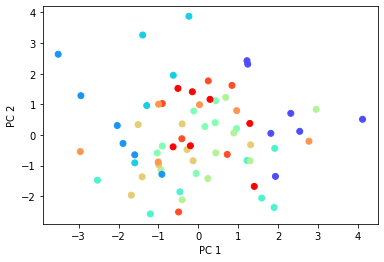

In [11]:
plt.scatter(pca_X[:,0], pca_X[:,1], c=colors)
plt.xlabel('PC 1')
plt.ylabel('PC 2')

In [12]:
combinedtable

,Sample,Barcode,nCount_RNA,nFeature_RNA,percent.mt,percent.rb,Doublet_score,Is_doublet,Batch
0,pHC1,AAACCCAAGAACTGAT-1,8190.138154,1981,6.270726,44.602450,0.133277,False,1
1,pHC1,AAACCCAAGCGGGTTA-1,647.635118,283,56.177759,8.505857,0.045970,False,1
2,pHC1,AAACCCAAGTGTAGAT-1,4685.023368,1580,5.360737,34.817887,0.052135,False,1
3,pHC1,AAACCCACAACAAAGT-1,7674.084207,1911,4.764881,45.586655,0.172450,False,1
4,pHC1,AAACCCACACGACAGA-1,12244.814303,2864,4.847984,42.132947,0.111273,False,1
...,...,...,...,...,...,...,...,...,...
491072,pHC17,TTTGTTGCAGACGATG-1,4937.070936,1429,3.647245,44.797781,0.097239,False,10
491073,pHC17,TTTGTTGGTTGTCTAG-1,5651.379463,1414,5.594797,47.947657,0.084416,False,10
491074,pHC17,TTTGTTGTCCAATCCC-1,4847.938567,1366,6.769203,42.045732,0.033604,False,10
491075,pHC17,TTTGTTGTCCAGGACC-1,4392.073705,1381,4.001835,42.678595,0.097239,False,10


In [13]:
#

In [14]:
combinetablearray = np.array(combinedtable)

In [15]:
curscaler = StandardScaler()
scaleddata = curscaler.fit_transform(combinetablearray[:,2:-1])

In [16]:
scaleddata

array([[ 0.39217313,  0.12013807, -0.23721303,  1.12102288,  0.68426306,
        -0.14739547],
       [-1.36241699, -1.76649269,  4.90943949, -1.32837338, -0.37867897,
        -0.14739547],
       [-0.42321133, -0.32540901, -0.33105541,  0.45707459, -0.30362686,
        -0.14739547],
       ...,
       [-0.38531285, -0.56318226, -0.18580772,  0.9475324 , -0.52922828,
        -0.14739547],
       [-0.49135934, -0.54651591, -0.47119194,  0.9904764 ,  0.2455037 ,
        -0.14739547],
       [ 0.23434977, -0.10430211, -0.32524851,  1.53687755,  0.84110689,
        -0.14739547]])

In [17]:
reducer = umap.UMAP(n_neighbors=30,
                    min_dist=0.0,
    n_components=2,
    random_state=929)

In [18]:
embedding = reducer.fit_transform(scaleddata)

In [19]:
hdbscan_predictor = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=500)

In [20]:
hdblabels = hdbscan_predictor.fit_predict(embedding)


In [21]:
sum(hdblabels==-1)

194

In [22]:
embedding

array([[ 2.185854 ,  3.0260918],
       [15.698148 , -6.736265 ],
       [ 9.250466 ,  0.4425061],
       ...,
       [ 8.013843 , -2.6839879],
       [ 6.7206993, -1.6060417],
       [ 2.8109913,  2.1532936]], dtype=float32)

([], [])

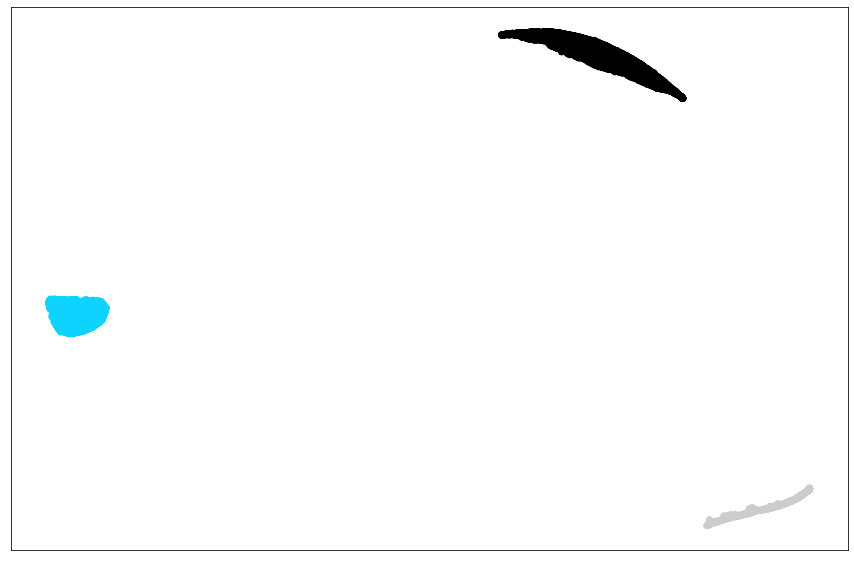

In [23]:
plt.figure(figsize=(15,10))
plt.scatter(
    embedding[((hdblabels != 3) & (hdblabels != -1)), 0],
    embedding[((hdblabels != 3) & (hdblabels != -1)), 1], c=hdblabels[((hdblabels != 3) & (hdblabels != -1))], cmap=mplcolors.ListedColormap(['#000000', '#ff3f0f', '#0fd3ff', '#24d433', '#cccccc']))
plt.xticks([],[])
plt.yticks([],[])

([], [])

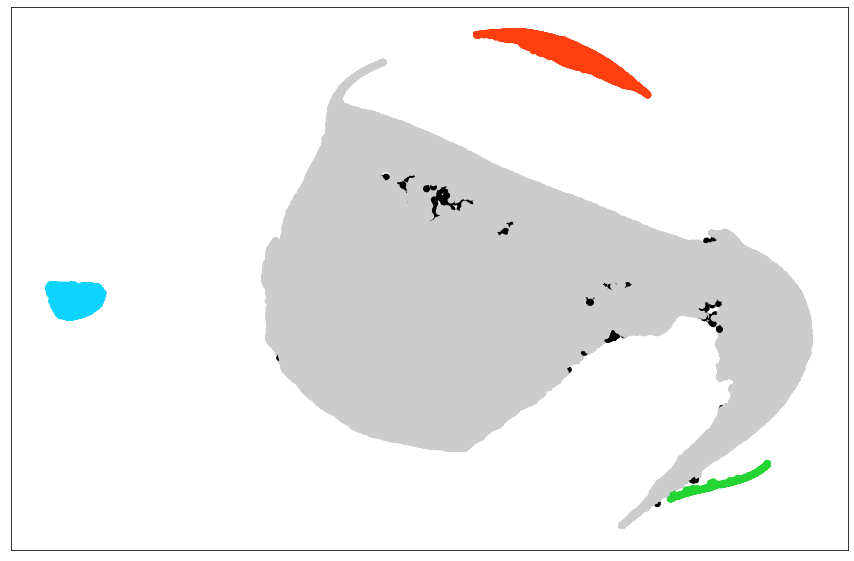

In [24]:
plt.figure(figsize=(15,10))
plt.scatter(
    embedding[:, 0],
    embedding[:, 1], c=hdblabels, cmap=mplcolors.ListedColormap(['#000000', '#ff3f0f', '#0fd3ff', '#24d433', '#cccccc']))
plt.xticks([],[])
plt.yticks([],[])

([], [])

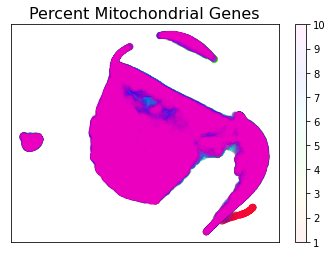

In [25]:
plt.figure(figsize=(6,4))
plt.scatter(
    embedding[:, 0],
    embedding[:, 1], c=combinedtable["Batch"], cmap="gist_rainbow", alpha=0.05)
#plt.gca().set_aspect('equal', 'datalim')
plt.colorbar()
plt.title('Percent Mitochondrial Genes', fontsize=16)
plt.xticks([],[])
plt.yticks([],[])

([], [])

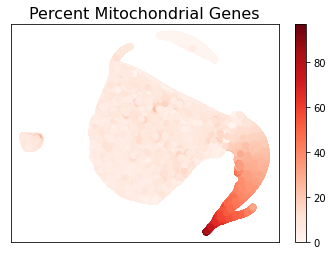

In [26]:
plt.figure(figsize=(6,4))
plt.scatter(
    embedding[:, 0],
    embedding[:, 1], c=combinedtable["percent.mt"], cmap="Reds")
#plt.gca().set_aspect('equal', 'datalim')
plt.colorbar()
plt.title('Percent Mitochondrial Genes', fontsize=16)
plt.xticks([],[])
plt.yticks([],[])

([], [])

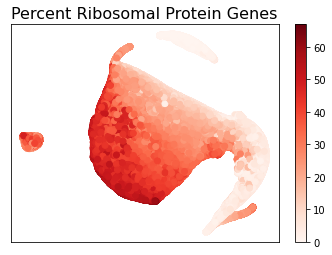

In [27]:
plt.figure(figsize=(6,4))
plt.scatter(
    embedding[:, 0],
    embedding[:, 1], c=combinedtable["percent.rb"], cmap="Reds")
#plt.gca().set_aspect('equal', 'datalim')
#
plt.colorbar()
plt.title('Percent Ribosomal Protein Genes', fontsize=16)
plt.xticks([],[])
plt.yticks([],[])

([], [])

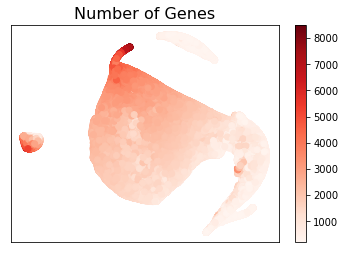

In [28]:
plt.figure(figsize=(6,4))
plt.scatter(
    embedding[:, 0],
    embedding[:, 1], c=combinedtable["nFeature_RNA"], cmap="Reds")
#plt.gca().set_aspect('equal', 'datalim')
#
plt.colorbar()

plt.title('Number of Genes', fontsize=16)
plt.xticks([],[])
plt.yticks([],[])

([], [])

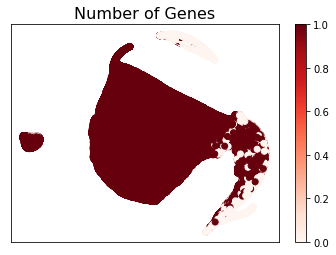

In [29]:
plt.figure(figsize=(6,4))
plt.scatter(
    embedding[:, 0],
    embedding[:, 1], c=combinedtable["nFeature_RNA"] > 500, cmap="Reds")
#plt.gca().set_aspect('equal', 'datalim')
#
plt.colorbar()

plt.title('Number of Genes', fontsize=16)
plt.xticks([],[])
plt.yticks([],[])

([], [])

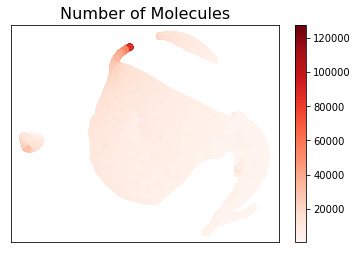

In [30]:
plt.figure(figsize=(6,4))
plt.scatter(
    embedding[:, 0],
    embedding[:, 1], c=combinedtable["nCount_RNA"], cmap="Reds")
#plt.gca().set_aspect('equal', 'datalim')
#
plt.colorbar()

plt.title('Number of Molecules', fontsize=16)
plt.xticks([],[])
plt.yticks([],[])

([], [])

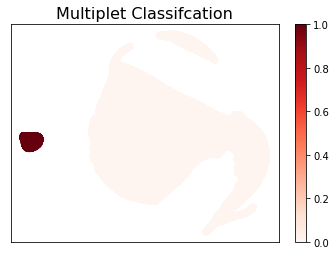

In [31]:
plt.figure(figsize=(6,4))
plt.scatter(
    embedding[:, 0],
    embedding[:, 1], c=combinedtable["Is_doublet"], cmap="Reds")
#plt.gca().set_aspect('equal', 'datalim')
#
plt.colorbar()

plt.title('Multiplet Classifcation', fontsize=16)
plt.xticks([],[])
plt.yticks([],[])

([], [])

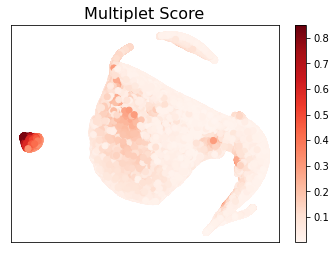

In [32]:
plt.figure(figsize=(6,4))
plt.scatter(
    embedding[:, 0],
    embedding[:, 1], c=combinedtable["Doublet_score"], cmap="Reds")
#plt.gca().set_aspect('equal', 'datalim')
#
plt.colorbar()

plt.title('Multiplet Score', fontsize=16)
plt.xticks([],[])
plt.yticks([],[])

In [40]:
np.mean(combinedtable["percent.mt"][hdblabels==-1])

8.69449516031137

In [41]:
np.max(combinedtable["nFeature_RNA"][hdblabels==2])

443

([], [])

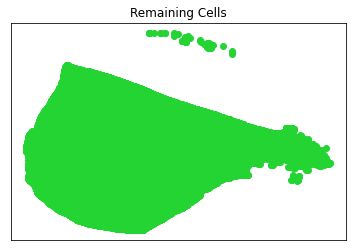

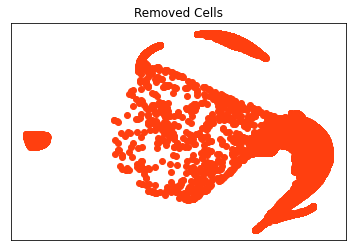

In [82]:
sel = np.array(combinedtable["percent.mt"] < 20)
##sel = combinedtable["percent.mt"] >= 0

sel = sel & (combinedtable["percent.mt"] > 1) #Justified by plots 
sel = sel & (combinedtable["nCount_RNA"] > 2000)#Justified by plots
sel = sel & (combinedtable["nCount_RNA"] < 25000)#Justified by plots

##sel = sel & (combinedtable["percent.rb"] > 6)#Justified by plots
sel = sel & (combinedtable["nFeature_RNA"] >= 500)
sel = sel & (combinedtable["Is_doublet"] == False)#Justified because scrublet
#sel = sel & (hdblabels != 2)#
#sel = sel & ((hdblabels == 3) | (hdblabels == -1))#

plt.figure(figsize=(6,4))
plt.title("Remaining Cells")#+str(np.sum(sel)))
plt.scatter(
    embedding[sel, 0],
    embedding[sel, 1], c="#24d433", cmap=mplcolors.ListedColormap(['#24d433']))
plt.xticks([],[])
plt.yticks([],[])

plt.figure(figsize=(6,4))
plt.title("Removed Cells")#+str(np.sum(~sel)))
plt.scatter(
    embedding[~sel, 0],
    embedding[~sel, 1], c="#ff3f0f", cmap=mplcolors.ListedColormap(['#ff3f0f']))
plt.xticks([],[])
plt.yticks([],[])
#plt.gca().set_aspect('equal', 'datalim')
#
#plt.colorbar()
#plt.legend()
#Note numbers may be off because one sample is excluded from further analysis but was included in this process

In [83]:
sum(sel) # Number of cells remaining

389281

In [84]:
491077-389281 # Number of cells removed

101796

In [85]:
101796/491077 # % of cells removed

0.20729132091301364

In [86]:
sum(sel & ((hdblabels == 3) | (hdblabels == -1)))

389228

In [87]:
sum((hdblabels != 3) & (hdblabels != -1))

22028

In [90]:
389281-389228 # Number of cells removed using clustering approach

53

In [102]:
(22028-53)/22028 # % overlap with previous criteria

0.9975939713092428

In [103]:
(22028-53)/101796

0.21587292231521868

In [91]:
sel = sel & ((hdblabels == 3) | (hdblabels == -1))

In [92]:
combinedtable["Passes_QC"] = sel

In [93]:
combinedtable

,Sample,Barcode,nCount_RNA,nFeature_RNA,percent.mt,percent.rb,Doublet_score,Is_doublet,Batch,Passes_QC
0,pHC1,AAACCCAAGAACTGAT-1,8190.138154,1981,6.270726,44.602450,0.133277,False,1,True
1,pHC1,AAACCCAAGCGGGTTA-1,647.635118,283,56.177759,8.505857,0.045970,False,1,False
2,pHC1,AAACCCAAGTGTAGAT-1,4685.023368,1580,5.360737,34.817887,0.052135,False,1,True
3,pHC1,AAACCCACAACAAAGT-1,7674.084207,1911,4.764881,45.586655,0.172450,False,1,True
4,pHC1,AAACCCACACGACAGA-1,12244.814303,2864,4.847984,42.132947,0.111273,False,1,True
...,...,...,...,...,...,...,...,...,...,...
491072,pHC17,TTTGTTGCAGACGATG-1,4937.070936,1429,3.647245,44.797781,0.097239,False,10,True
491073,pHC17,TTTGTTGGTTGTCTAG-1,5651.379463,1414,5.594797,47.947657,0.084416,False,10,True
491074,pHC17,TTTGTTGTCCAATCCC-1,4847.938567,1366,6.769203,42.045732,0.033604,False,10,True
491075,pHC17,TTTGTTGTCCAGGACC-1,4392.073705,1381,4.001835,42.678595,0.097239,False,10,True


In [95]:
#combinedtable.to_csv("QCSummary.txt", index=False, sep="\t")

In [96]:

def getSummaryTableData(table, sampleids):
    mat = []
    for cursample in sampleids:
        sel = table['Sample'] == cursample
        seltable = table[sel]
        totalcells = len(seltable)
        doublets = np.sum(seltable["Is_doublet"] == True)
        qcremoved = np.sum(seltable["Passes_QC"] == False)-doublets
        cellafterqc = np.sum(seltable["Passes_QC"] == True)
        mat.append([totalcells, doublets, qcremoved, cellafterqc])
    return pd.DataFrame(mat, index=sampleids, columns=["Total Cells", "Doublets", "QC Filters", "Remaining Cells"])

In [98]:
sampleist = [
    "pHC1",
"pHC2",
"pHC3",
"pHC4",
"pHC5",
"pHC6",
"pHC7"
]
getSummaryTableData(combinedtable, sampleist)

,Total Cells,Doublets,QC Filters,Remaining Cells
pHC1,6716,6,1664,5046
pHC2,10004,359,2260,7385
pHC3,7709,187,1438,6084
pHC4,13293,3,5029,8261
pHC5,5041,27,895,4119
pHC6,4398,41,407,3950
pHC7,5429,20,1494,3915


In [99]:
sampleist = [
"pCoV1",
"pCoV2",
"pCoV3",
"pCoV4",
"pCoV5",
"pOI1"
]
getSummaryTableData(combinedtable, sampleist)

,Total Cells,Doublets,QC Filters,Remaining Cells
pCoV1,5723,157,1016,4550
pCoV2,3191,18,332,2841
pCoV3,5427,168,313,4946
pCoV4,7402,293,1823,5286
pCoV5,6827,153,527,6147
pOI1,7013,258,499,6256


In [100]:
sampleist = ["pCoV6",
"pCoV7",
"pCoV8",
"pCoV9",
"pHC8"]
getSummaryTableData(combinedtable, sampleist)

,Total Cells,Doublets,QC Filters,Remaining Cells
pCoV6,9413,4,434,8975
pCoV7,5781,230,718,4833
pCoV8,6854,13,511,6330
pCoV9,5732,156,407,5169
pHC8,6974,125,312,6537


In [104]:
sampleist = [
"pCoV10",
"pCoV11",
"pRSV1",
"pRSV2",
"pRSV3",
"pRSV4",
"pHC9"]

getSummaryTableData(combinedtable, sampleist)

,Total Cells,Doublets,QC Filters,Remaining Cells
pCoV10,6599,153,1925,4521
pCoV11,3637,146,1172,2319
pRSV1,5194,164,2562,2468
pRSV2,4295,48,2247,2000
pRSV3,6694,222,1702,4770
pRSV4,6546,162,2261,4123
pHC9,5912,73,1783,4056


In [105]:
sampleist = [
"pCoV12",
"pCoV13",
"pCoV14",
"pRSV5",
"pRSV6",
"pRSV7",
"pRSV8",
"pHC10"]

getSummaryTableData(combinedtable, sampleist)

,Total Cells,Doublets,QC Filters,Remaining Cells
pCoV12,7806,71,1426,6309
pCoV13,6444,185,571,5688
pCoV14,6556,191,617,5748
pRSV5,7381,234,868,6279
pRSV6,7849,243,1135,6471
pRSV7,6789,167,974,5648
pRSV8,8241,323,912,7006
pHC10,7358,231,690,6437


In [106]:
samplelist = [
    "pCoV15",
"pCoV16",
"pCoV17",
"pCoV18",
"pCoV19",
"pCoV20",
"pHC11",
"pHC12"
]
getSummaryTableData(combinedtable, samplelist)

,Total Cells,Doublets,QC Filters,Remaining Cells
pCoV15,9456,247,1776,7433
pCoV16,6447,120,780,5547
pCoV17,4275,53,1449,2773
pCoV18,7725,86,961,6678
pCoV19,14008,4,6986,7018
pCoV20,8842,223,1411,7208
pHC11,10605,347,1203,9055
pHC12,9204,251,1301,7652


In [107]:
samplelist = [
    "pCoV21",
"pCoV22",
"pCoV23",
"pCoV24",
"pCoV25",
"pCoV26",
"pHC13",
"pHC14"
]
getSummaryTableData(combinedtable, samplelist)

,Total Cells,Doublets,QC Filters,Remaining Cells
pCoV21,6761,173,972,5616
pCoV22,10750,5,4094,6651
pCoV23,9367,307,957,8103
pCoV24,4960,96,854,4010
pCoV25,10788,389,1238,9161
pCoV26,8544,182,811,7551
pHC13,10437,352,1282,8803
pHC14,8576,208,791,7577


In [109]:
samplelist = [
"pCoV27",
"pCoV28",
"pRSV9",
"pRSV10",
"pRSV14",
"pHC15"
]
getSummaryTableData(combinedtable, samplelist)

,Total Cells,Doublets,QC Filters,Remaining Cells
pCoV27,4234,64,597,3573
pCoV28,8403,13,2569,5821
pRSV9,6978,53,1440,5485
pRSV10,7536,188,999,6349
pRSV14,6332,102,822,5408
pHC15,8296,155,1238,6903


In [110]:
samplelist = [
"pCoV29",
"pCoV30",
"pRSV12",
"pRSV11",
"pRSV15",
"pHC16"
]
getSummaryTableData(combinedtable, samplelist)

,Total Cells,Doublets,QC Filters,Remaining Cells
pCoV29,7102,278,3141,3683
pCoV30,6271,123,736,5412
pRSV12,7327,162,1007,6158
pRSV11,4608,73,506,4029
pRSV15,5035,13,733,4289
pHC16,6999,134,682,6183


In [111]:
samplelist = [
    "pCoV31",
"pRSV13",
"pRSV18",
"pRSV16",
"pRSV17",
"pRSV19",
"pHC17"
]
getSummaryTableData(combinedtable, samplelist)

,Total Cells,Doublets,QC Filters,Remaining Cells
pCoV31,5771,74,758,4939
pRSV13,8480,274,2368,5838
pRSV18,7066,190,975,5901
pRSV16,6025,224,1399,4402
pRSV17,8375,170,1087,7118
pRSV19,7204,74,1434,5696
pHC17,8062,204,1126,6732
